In [ ]:
!pip install pyspark


In [ ]:
from google.colab import files
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"divanshijain06","key":"7742fd92f5ddb6c84904cd3339a2649b"}'}

In [ ]:
# Rename the file to kaggle.json
!mv "kaggle (2).json" kaggle.json

# Create Kaggle directory and set up API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors


In [ ]:
!unzip garbage-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

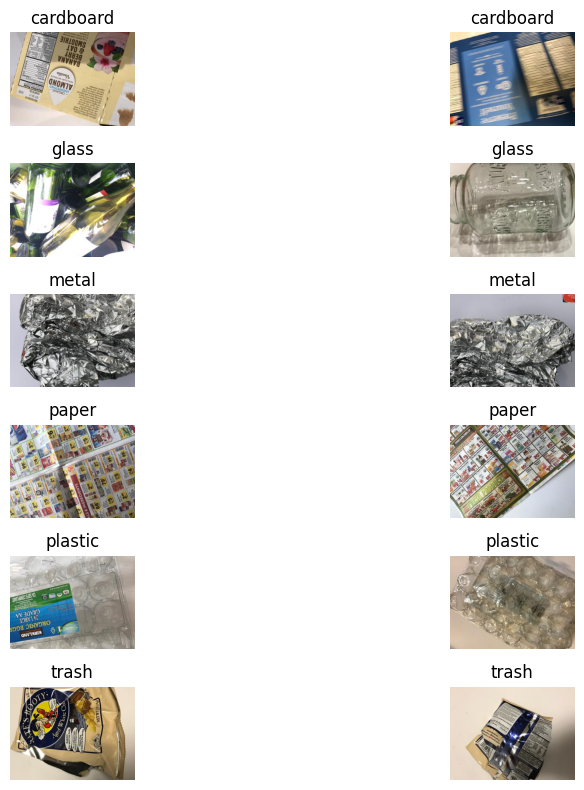

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import input_file_name
from PIL import Image
import matplotlib.pyplot as plt
import urllib.parse

# Step 1: Start Spark session
spark = SparkSession.builder.appName("ShowImagesFromEachCategory").getOrCreate()

# Step 2: Define categories
categories = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Step 3: Load images and show 2 per category
plt.figure(figsize=(12, 8))
idx = 1
for category in categories:
    # Load images for the current category
    df = spark.read.format("image").load(f"/content/Garbage classification/Garbage classification/{category}")
    df = df.withColumn("file_path", input_file_name())

    # Collect 2 image paths
    paths = df.limit(2).select("image.origin").rdd.flatMap(lambda x: x).collect()
    paths = [urllib.parse.unquote(p.replace("file:", "")) for p in paths]  # clean "file:" prefix if it exists

    # Plot the images
    for i, path in enumerate(paths):
        img = Image.open(path)
        plt.subplot(len(categories), 2, idx)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")
        idx += 1

plt.tight_layout()
plt.show()


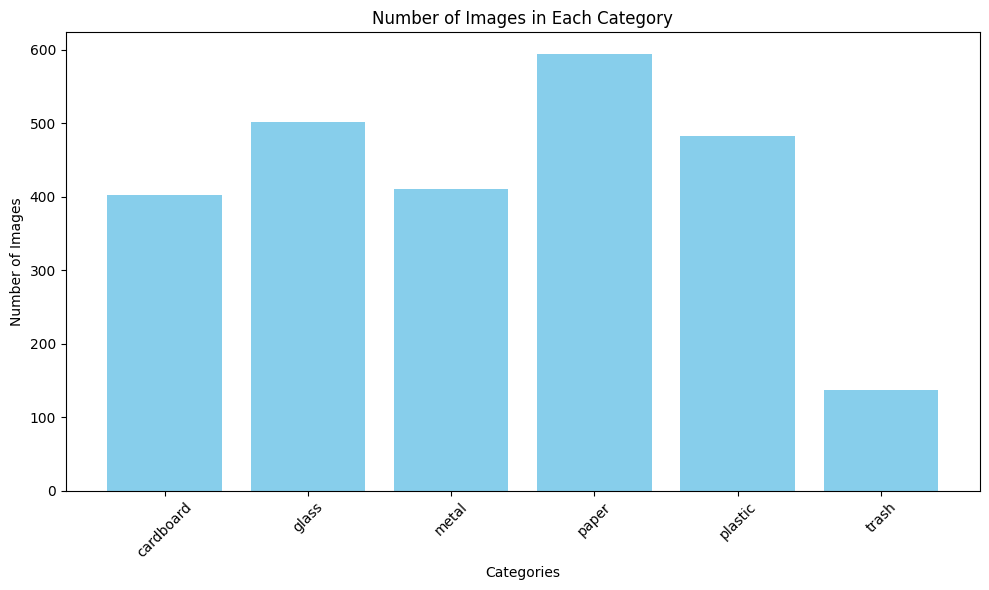

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import input_file_name
import matplotlib.pyplot as plt
import urllib.parse

# Step 1: Start Spark session
spark = SparkSession.builder.appName("ImageCategoryCount").getOrCreate()

# Step 2: Define categories
categories = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Step 3: Count number of images in each category
category_counts = {}

for category in categories:
    # Load images for the current category
    df = spark.read.format("image").load(f"/content/Garbage classification/Garbage classification/{category}")

    # Count number of images in the category
    count = df.count()
    category_counts[category] = count

# Step 4: Plot bar graph
categories_list = list(category_counts.keys())
counts_list = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(categories_list, counts_list, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
